# Added 30% of duplicates

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import sanity_checks_methods
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['sex'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['sex'] >= 0]

sanity_checks_methods.drop_negative_age(df)

## Adding duplicates

In [2]:
print('--------------------------------------')
sanity_checks_methods.print_duplicates_values(df) 

print(f'\nADDING 30% TO FEATURE \n')

df_dirty = sanity_checks_methods.duplicates_values(df, 30)
sanity_checks_methods.print_duplicates_values(df_dirty)

--------------------------------------
Number of rows:  9999
Duplicate Counts:  0
Percentage of Duplicate Values:  0.0

ADDING 30% TO FEATURE 

Number of rows:  12998
Duplicate Counts:  2999
Percentage of Duplicate Values:  23.072780427758115


## Decision Tree

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4498
           1       0.98      1.00      0.99      4600

    accuracy                           0.99      9098
   macro avg       0.99      0.99      0.99      9098
weighted avg       0.99      0.99      0.99      9098

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1958
           1       0.96      0.99      0.97      1942

    accuracy                           0.97      3900
   macro avg       0.98      0.97      0.97      3900
weighted avg       0.98      0.97      0.97      3900

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4999
           1       0.97      1.00      0.98      5000

    accuracy                           0.98      9999


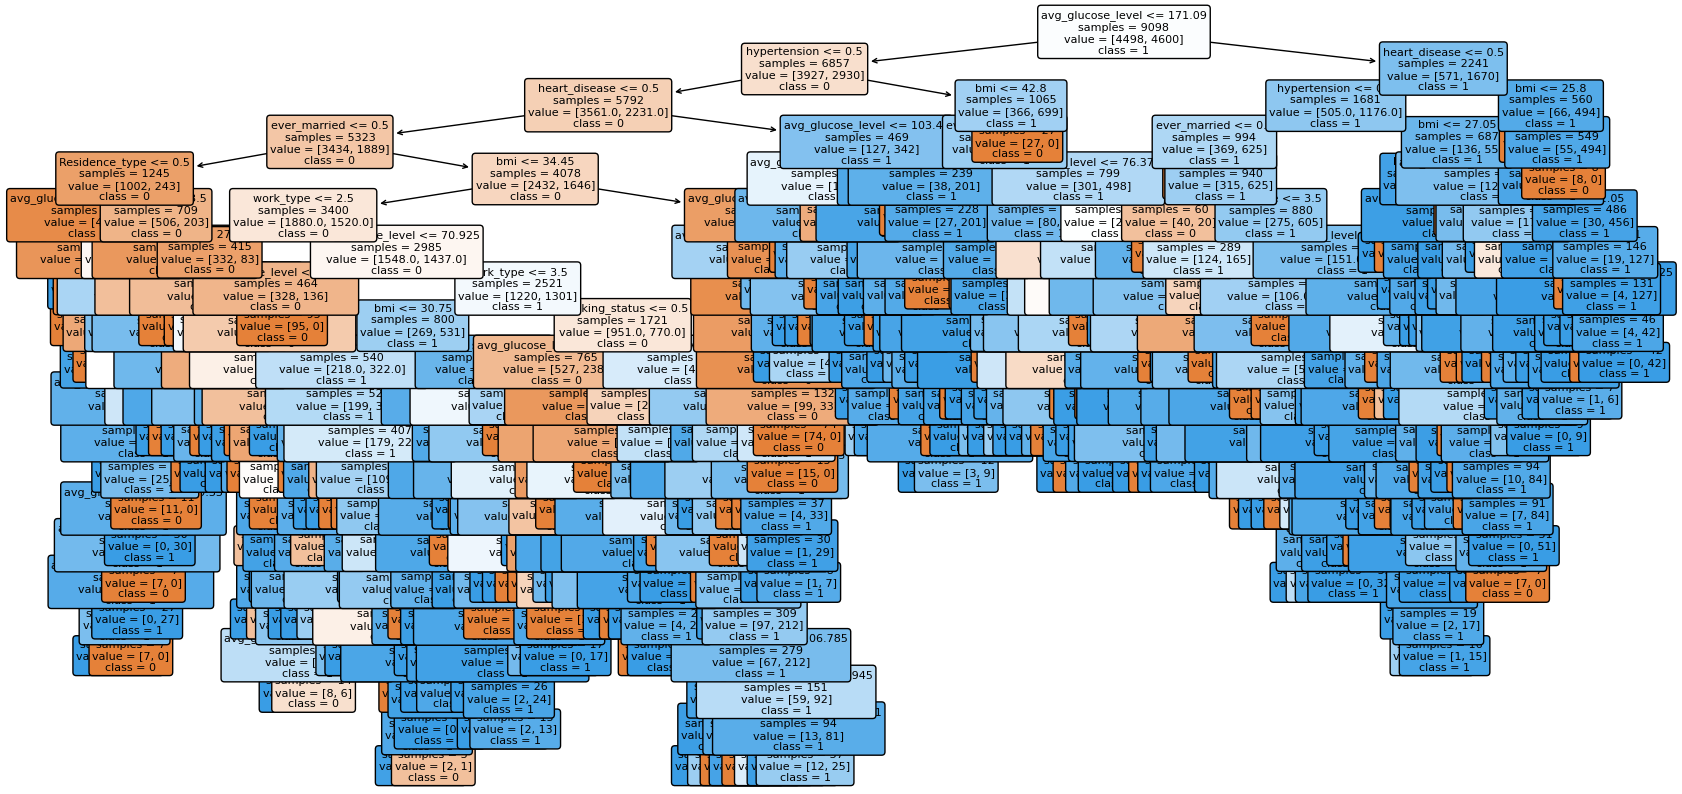

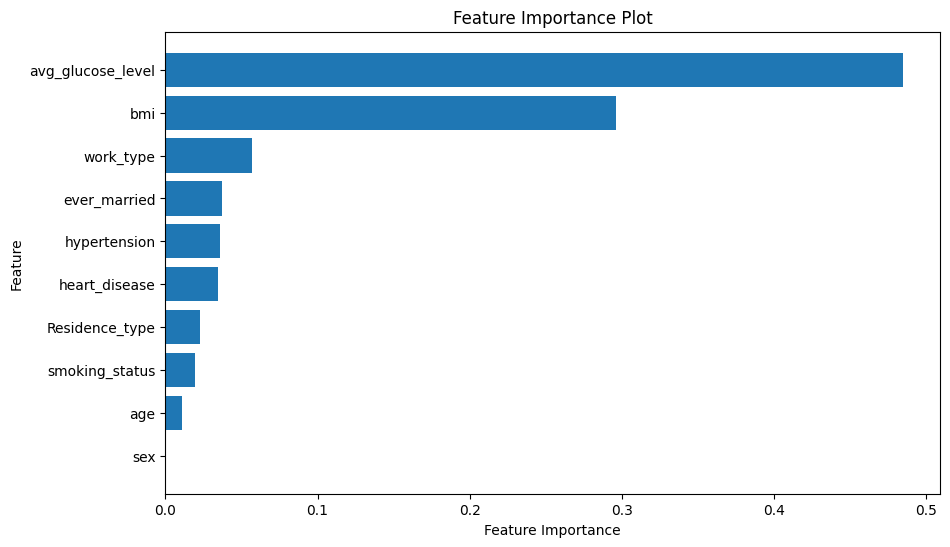

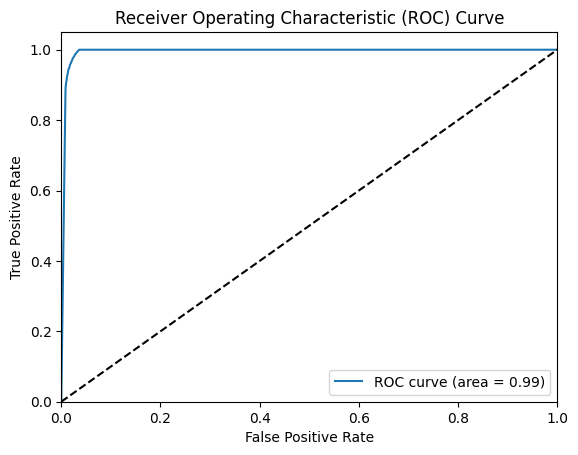

AUC Score: 0.9942922384476895


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9659340659340659, 0.9747252747252747, 0.9593406593406594, 0.9681318681318681, 0.967032967032967, 0.9736263736263736, 0.9736263736263736, 0.9692307692307692, 0.9735973597359736, 0.9746974697469747]
Mean accuracy: 0.96999431811313
95% confidence interval: (0.9664042480937602, 0.9735843881324997)


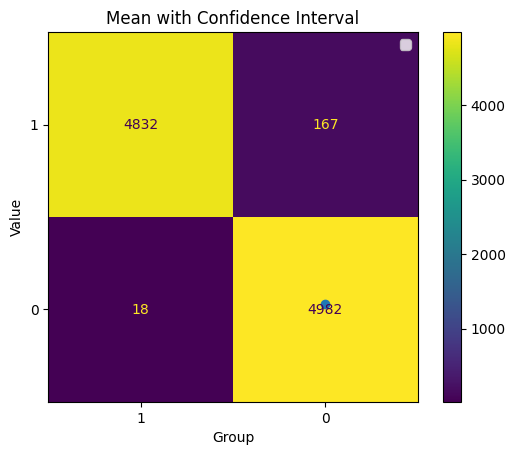

In [3]:
decision_tree = ML_algorithms.train_decision_tree_model(df_dirty, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_dirty)


## Hist Gradient Boosting Classifier

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 45.03202223777771
Best parameters found:  {'l2_regularization': 0.2, 'learning_rate': 0.3, 'max_depth': 6, 'max_iter': 257, 'min_samples_leaf': 6}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4498
           1       1.00      1.00      1.00      4600

    accuracy                           1.00      9098
   macro avg       1.00      1.00      1.00      9098
weighted avg       1.00      1.00      1.00      9098

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1958
           1       0.99      1.00      0.99      1942

    accuracy                           0.99      3900
   macro avg       0.99      0.99      0.99      3900
weighted avg       0.99      0.99      0.99      3900



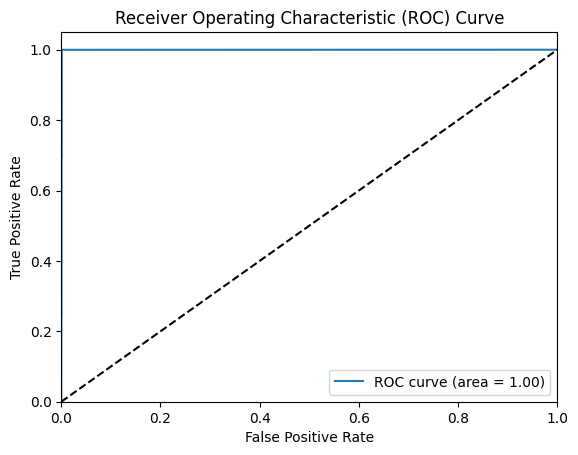

AUC Score: 0.9994762152430485


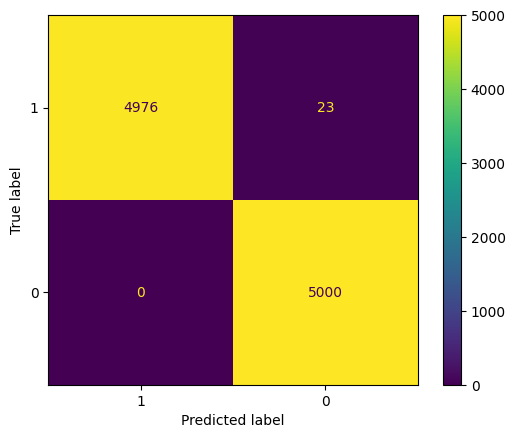

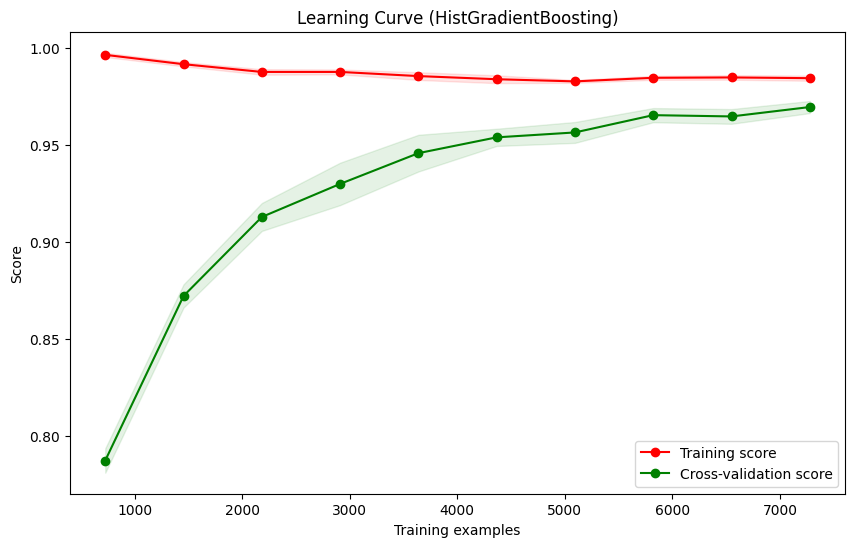

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9978021978021978, 0.9923076923076923, 0.9912087912087912, 0.9945054945054945, 0.9945054945054945, 0.9934065934065934, 0.9912087912087912, 0.9967032967032967, 0.9900990099009901, 0.9944994499449945]
Mean accuracy: 0.9936246811494337
95% confidence interval: (0.9918541534270636, 0.9953952088718038)


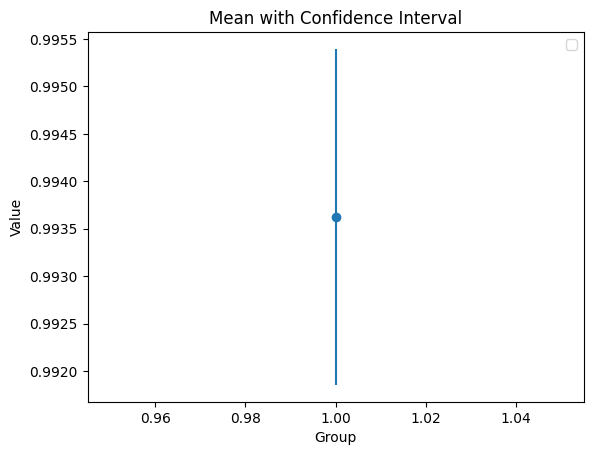

--------------------------------------


In [4]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_dirty, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb, df_dirty)

print('--------------------------------------')